In [1]:
#------------ Modules Imports ----------------------#
%load_ext autoreload
%autoreload 2

import numpy as np 
import pandas as pd
from math import *
import QuantLib as ql 
from makeSwap import makeSwap
from makeSwaption import makeSwaption
from makeFxOption import makeFxOption
from makeCapFloor import makeCapFloor 

from SIMM_Kit import *
%matplotlib inline

### Portfolio 1: Portfolio of swaps

In [2]:
#swaps parameters
startDateVect = [ql.Date(15, 8, 2020)]
maturitiesVect = [ql.Period("5Y") ]
endDateVect = [startDateVect[i] + maturitiesVect[i] for i in range(len(startDateVect))]
nominalsVect = [1e6 ]
fixedRateVect = [0.03]
indexVect=["euribor 6M"]
fixedLegtenors = [ql.Period("6M")]
swapTypes = [ql.VanillaSwap.Receiver]

#Evaluation Date
evaluationDate = ql.Date(20,8,2020)

initialParamsValues = [nominalsVect,startDateVect,maturitiesVect,fixedRateVect,indexVect,fixedLegtenors,swapTypes]

# Discount and forecast curves
depoFraSwapCurve = makeEuriborHandle(startDateVect[0], endDateVect[0], fixedLegtenors[0])

##### Initial margin calculation under Grid Method and SIMM method

In [3]:
IM_Grid = IM_Grid_method(im_Schedule,  initialParamsValues, evaluationDate, depoFraSwapCurve, depoFraSwapCurve)[2]
IM_SIMM = 28000

In [4]:
IM_SIMM = Compute_IM(evaluationDate, initialParamsValues, depoFraSwapCurve, 230)
IM_SIMM, IM_Grid

(28305.62941703243, 20000.0)

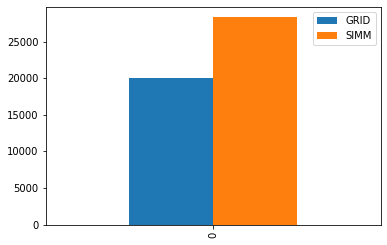

In [5]:
df = pd.DataFrame({'GRID': IM_Grid, 
                  'SIMM': IM_SIMM}, index=[0])
df.plot.bar()